In [1]:
# %%
import copy
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import time
import wandb

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters for the example
# start_prob_increase = 0.1
# end_prob_increase = 0.9
# total_generations = 100

# # Linear increase
# def linear_increase(start_prob, end_prob, current_gen, total_gens):
#     return start_prob + (current_gen / total_gens) * (end_prob - start_prob)

# # Exponential increase
# def exponential_increase(start_prob, end_prob, current_gen, total_gens):
#     return start_prob * (end_prob / start_prob) ** (current_gen / total_gens)

# # Generate data for increasing probabilities
# generations = np.arange(total_generations)
# linear_probs_increase = [linear_increase(start_prob_increase, end_prob_increase, gen, total_generations) for gen in generations]
# exponential_probs_increase = [exponential_increase(start_prob_increase, end_prob_increase, gen, total_generations) for gen in generations]

# # Plotting the graphs
# plt.figure(figsize=(12, 6))

# # Linear increase plot
# plt.subplot(1, 2, 1)
# plt.plot(generations, linear_probs_increase, label='Linear Increase')
# plt.xlabel('Generations')
# plt.ylabel('Probability')
# plt.title('Linear Increase of Probability')
# plt.legend()

# # Exponential increase plot
# plt.subplot(1, 2, 2)
# plt.plot(generations, exponential_probs_increase, label='Exponential Increase', color='red')
# plt.xlabel('Generations')
# plt.ylabel('Probability')
# plt.title('Exponential Increase of Probability')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [7]:



# now = datetime.now()
# scenario = "scenario_2"
# run_name = f"{scenario}_analytics"
# current_datetime =now.strftime("%d/%b/%Y_%H:%M:%S")
# run_name = "_".join([run_name, current_datetime])

# wandb.login(
#     key="a9cbb8af7a708fc893fe0aaf2f50d9e51aed6f34"
# )
# wb = wandb.init(
#     project = "GA_Parameter_Tuning",
#     name = run_name,
#     config ={
#         "scenario": scenario
#     }, 
#     allow_val_change=True)


# wb.define_metric("day_num")
# wb.define_metric("demand_per_day", step_metric="day_num")
# wb.define_metric("energy_avail_per_day", step_metric="day_num")

In [2]:
WEEK_ONE_SLOTS = 168
WEEK_TWO_SLOTS = 336
DAY_SLOT = 24

In [11]:
s1_demand = list()
s2_demand = list()
s3_demand = list()
s4_demand = list()
s5_demand = list()
energy = list()

In [12]:

data = pd.read_excel('./data/data.xlsx', 'scenario_2_training')  # energy usage data
data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0
#data = data.drop(['CPEHC', 'CPER1', 'CPESC'], axis=1)
data.drop(index=data.index[0:WEEK_TWO_SLOTS], axis=0, inplace=True)
data = data.reset_index(drop=True)

demand_data = copy.copy(data)
demand_data = demand_data.filter(regex='CPE|LVL')  # extract CPE and socket data
demand_data = demand_data.astype(float)



n_days = int(len(demand_data) / DAY_SLOT)
cols = demand_data.columns 
demand_data['demand_col_sum'] = demand_data.sum(axis = 1)

for u in range(n_days):
    day_power =(np.sum((data.loc[(u*DAY_SLOT): (u*DAY_SLOT + DAY_SLOT - 1), 'Potential_PV_power_W']), axis = 0))/ 1000
    energy.append(day_power)

/tmp/ipykernel_2235/1873214006.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.read_excel('./data/data.xlsx', 'scenario_2_training')  # energy usage data
/tmp/ipykernel_2235/1873214006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0


In [17]:

data = pd.read_excel('./data/data.xlsx', 'scenario_5_testing')  # energy usage data
data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0
#data = data.drop(['CPEHC', 'CPER1', 'CPESC'], axis=1)
data.drop(index=data.index[0:WEEK_TWO_SLOTS], axis=0, inplace=True)
data = data.reset_index(drop=True)

demand_data = copy.copy(data)
demand_data = demand_data.filter(regex='CPE|LVL')  # extract CPE and socket data
demand_data = demand_data.astype(float)



n_days = int(len(demand_data) / DAY_SLOT)
cols = demand_data.columns 
demand_data['demand_col_sum'] = demand_data.sum(axis = 1)

for u in range(n_days): 
    day_demand =(np.sum((demand_data.loc[(u*DAY_SLOT): (u*DAY_SLOT + DAY_SLOT - 1), 'demand_col_sum']), axis = 0))/1000
    s5_demand.append(day_demand)
    

/tmp/ipykernel_2235/4039464480.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.read_excel('./data/data.xlsx', 'scenario_5_testing')  # energy usage data
/tmp/ipykernel_2235/4039464480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0


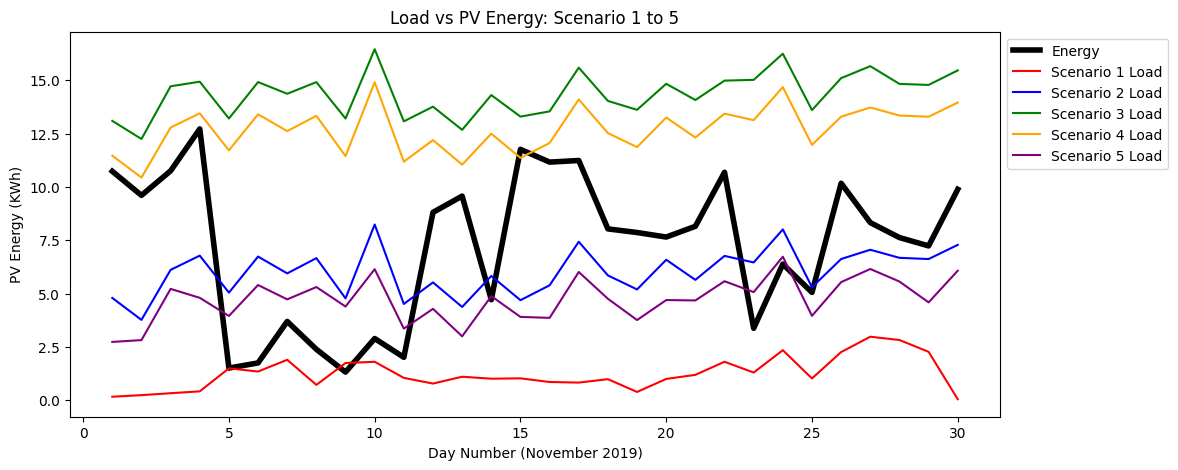

In [52]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt


days = list(range(1, 31))

plt.figure(figsize=(12, 5))

# Plotting the baseline data
plt.plot(days, energy, linewidth = 4, color='black', label='Energy')
plt.plot(days, s1_demand, color='red', label='Scenario 1 Load')
plt.plot(days, s2_demand, color='blue', label='Scenario 2 Load')
plt.plot(days, s3_demand, color='green', label='Scenario 3 Load')
plt.plot(days, s4_demand, color='orange', label='Scenario 4 Load')
plt.plot(days, s5_demand, color='purple', label='Scenario 5 Load')

# Adding labels to the axes
plt.xlabel('Day Number (November 2019)')
plt.ylabel('PV Energy (KWh)')
plt.title("Load vs PV Energy: Scenario 1 to 5")
# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.xticks(days)
# plt.ylim(-1.5, 1.5)
# Displaying the plot
plt.show()
# len(base_fv)

# plt.savefig('output_graphs/s5_demand.png')

In [40]:
with open('s5_demand.pickle', 'wb') as f:
    pickle.dump(s5_demand, f)

In [69]:
old_run = wandb.init(project = "GA_Parameter_Tuning", resume = 'c370to8o')
old_run.define_metric("hour")
old_run.define_metric("soc_each_hour", step_metric="hour")


wandb: WARNING Ensure read and write access to run files dir: /nvme/jilanii/parameter_tuning/wandb/run-20240504_151758-c370to8o/files, control this via the WANDB_DIR env var. See https://docs.wandb.ai/guides/track/environment-variables


hour,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
soc_each_hour,█▇███▇▇██▆▇▇█▆▇▆█▇▄▆█▅▆▆██▆▆█▅▂▁▁█▄▆▆█▆▇
day_num,29
demand_per_day,15.46664
energy_avail_per_day,9.8883
hour,719
soc_each_hour,93.85


In [68]:
h = 0
for i in range(len(data_soc)):
    
    # if h > 23:
    #     h = 0
    #     #print(h)
    old_run.log({"soc_each_hour":data_soc[i], "hour":h})
    print(h)
    h = h + 1 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [64]:
old_run.finish()
wb.finish()

wandb: WARNING Ensure read and write access to run files dir: /nvme/jilanii/parameter_tuning/wandb/run-20240504_150904-uxkjg974/files, control this via the WANDB_DIR env var. See https://docs.wandb.ai/guides/track/environment-variables


hour,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇██
soc_each_hour,█▇█▇▇▇█▇▇▄██▇▆█▃▁▄▅██▇▇█▇▇▆█▇▆▅██▆▅▃█▆▅▇
day_num,29
demand_per_day,7.28464
energy_avail_per_day,9.8883
hour,719
soc_each_hour,93.85


In [4]:
data = pd.read_excel('./data/data.xlsx', 'scenario_1_nov')  # energy usage data
data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0
#data = data.drop(['CPEHC', 'CPER1', 'CPESC'], axis=1)
data.drop(index=data.index[0:WEEK_TWO_SLOTS], axis=0, inplace=True)
data = data.reset_index(drop=True)

demand_data = copy.copy(data)
demand_data = demand_data.filter(regex='CPE|LVL')  # extract CPE and socket data
demand_data = demand_data.astype(float)

n_days = int(len(demand_data) / DAY_SLOT)
cols = demand_data.columns 
demand_data['demand_col_sum'] = demand_data.sum(axis = 1)

for u in range(n_days): 
    day_demand =(np.sum((demand_data.loc[(u*DAY_SLOT): (u*DAY_SLOT + DAY_SLOT - 1), 'demand_col_sum']), axis = 0))/1000
    day_power =(np.sum((data.loc[(u*DAY_SLOT): (u*DAY_SLOT + DAY_SLOT - 1), 'Potential_PV_power_W']), axis = 0))/ 1000
    wb.log({"demand_per_day": day_demand, "day_num": u})
    wb.log({"energy_avail_per_day": day_power, "day_num": u})
    #wb.log({"demand_power_per_day": {"demand_per_day": day_demand, "energy_avail_per_day": day_power  }})

/tmp/ipykernel_21237/3919091350.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.read_excel('./data/data.xlsx', 'scenario_1_nov')  # energy usage data
/tmp/ipykernel_21237/3919091350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Potential_PV_power_W'][data['Potential_PV_power_W'] < 0] = 0


In [6]:
old_run = wandb.init(project = "GA_Parameter_Tuning", resume = 'cbsyjicf')
columns = ['Run Name', 'model','Fitness','Battery Lifetime', 'Capacity Shortage', 'Duration', 'p_c', 'p_m']
results_table = wandb.Table(columns = columns)
results_table.add_data("dumy_run", "dummy model", '0', '0', '0', '0', '0', '0')
old_run.log({"results": results_table})

wandb: WARNING Ensure read and write access to run files dir: /nvme/jilanii/parameter_tuning/wandb/run-20240514_183010-cbsyjicf/files, control this via the WANDB_DIR env var. See https://docs.wandb.ai/guides/track/environment-variables


In [14]:
old_run = wandb.init(project = "GA_Parameter_Tuning", resume = 'cbsyjicf')
columns = ['Run Name', 'model','Fitness','Battery Lifetime', 'Capacity Shortage', 'Duration', 'p_c', 'p_m']
results_table = wandb.Table(columns = columns)
# results_table = old_run.use_artifact("run-cbsyjicf-results:v1")
results_table.add_data("dumy_run2", "dummy model", '0', '0', '0', '0', '0', '0')
old_run.log({"results": results_table})
# print(results_table.type)

# columns = ['Run Name', 'model','Fitness','Battery Lifetime', 'Capacity Shortage', 'Duration', 'p_c', 'p_m']
# results_table = wandb.Table(columns = columns)
# results_table.add_data("dumy_run", "dummy model", '0', '0', '0', '0', '0', '0')
# old_run.config.update({"results_summary": results_table}, allow_val_change=True)

wandb: WARNING Ensure read and write access to run files dir: /nvme/jilanii/parameter_tuning/wandb/run-20240514_184336-cbsyjicf/files, control this via the WANDB_DIR env var. See https://docs.wandb.ai/guides/track/environment-variables


In [4]:
old_run = wandb.init(project = "GA_Parameter_Tuning", resume = 'mjdgzitb')
old_run.config["final_prob_mutation"] = 0.8937692474329743
old_run.config["final_prob_crossover"] = 0.5939852077021733
old_run.config["best_fv_average"] = 0.291

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jilanii (csm_matthew_england). Use `wandb login --relogin` to force relogin


In [53]:
import pickle 
import numpy as np

fv = None


with open("output_pickle/tuned_scenario5_03_Jul_2024_05_40_02_dur.pickle", "rb") as f:
    fv =  pickle.load(f)


fv_old = fv
fv = sorted(fv)
# fv = fv[10:]
fv_average = np.sum(fv)/30
print(min(fv))
print(fv_average)
print(fv[-2])


[29.29866051]
43.27403007533815
[66.02020716]


In [54]:
np.argmax(fv_old)

21

In [47]:
fv

[array([0.10197572]),
 array([0.10515885]),
 array([0.11035696]),
 array([0.15002509]),
 array([0.22532597]),
 array([0.23643417]),
 array([0.24547896]),
 array([0.25020722]),
 array([0.26530012]),
 array([0.26925663]),
 array([0.27229857]),
 array([0.27301639]),
 array([0.27590547]),
 array([0.27856797]),
 array([0.28523708]),
 array([0.30029865]),
 array([0.33111381]),
 array([0.38663888]),
 array([0.42989777]),
 array([0.94289368])]

In [72]:
days = list(range(1, 21))
days

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

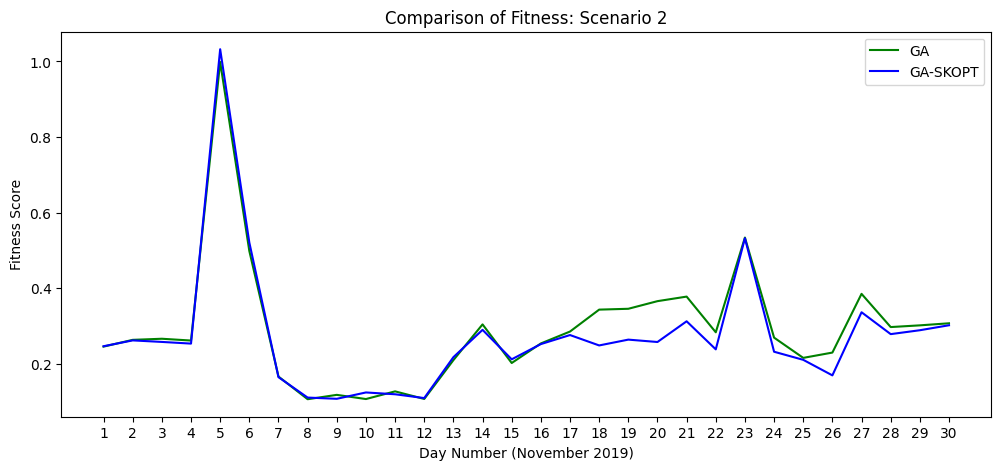

<Figure size 640x480 with 0 Axes>

In [4]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

base_fv = None
tuned_fv = None
days = list(range(1, 31))

with open("output_pickle/tuned_scenario2_05_Jul_2024_18_25_00_fv.pickle", "rb") as f:
    base_fv =  pickle.load(f)
    

with open("output_pickle/untuned_scenario2_baseline_05_Jul_2024_18_24_38_fv.pickle", "rb") as f:
    tuned_fv =  pickle.load(f)
    # tuned_fv = tuned_fv[5:25]


plt.figure(figsize=(12, 5))

# Plotting the baseline data
plt.plot(days, base_fv, color='green', label='GA')
plt.plot(days, tuned_fv, color='blue', label='GA-SKOPT')

# Adding labels to the axes
plt.xlabel('Day Number (November 2019)')
plt.ylabel('Fitness Score')
plt.title("Comparison of Fitness: Scenario 2")
# Adding a legend
plt.legend()

plt.xticks(days)
# plt.ylim(-1.5, 1.5)
# Displaying the plot
plt.show()
# len(base_fv)

plt.savefig('output_graphs/scenario2_fitness.png')

In [3]:
days = list(range(1, 31))
days

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

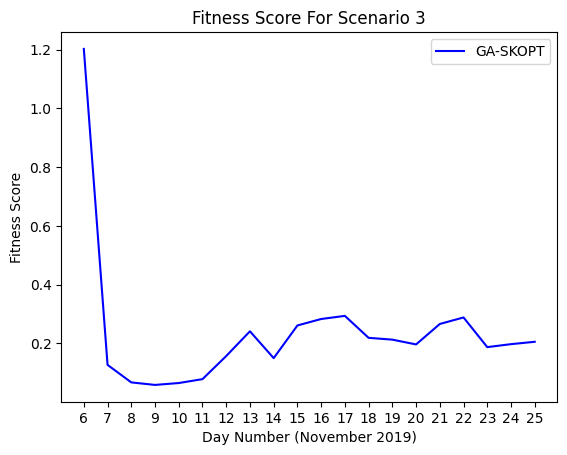

<Figure size 640x480 with 0 Axes>

In [7]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

base_fv = None
tuned_fv = None
days = list(range(6, 26))


with open("output_pickle/tuned_scenario3_24_Jun_2024_18_43_49_fv.pickle", "rb") as f:
    tuned_fv =  pickle.load(f)
    tuned_fv = tuned_fv[5:25]

    


plt.plot(days, tuned_fv, color='blue', label='GA-SKOPT')

# Adding labels to the axes
plt.xlabel('Day Number (November 2019)')
plt.ylabel('Fitness Score')
plt.title("Fitness Score For Scenario 3")
# Adding a legend
plt.legend()

plt.xticks(days)
# Displaying the plot
plt.show()
# len(base_fv)

plt.savefig('output_graphs/s3_fitness.png')

In [8]:
tuned_fv

array([[1.20294068],
       [0.12611571],
       [0.06643523],
       [0.05784216],
       [0.0642768 ],
       [0.07755151],
       [0.15628796],
       [0.24060864],
       [0.14914562],
       [0.2604559 ],
       [0.2824931 ],
       [0.29314525],
       [0.21831982],
       [0.21218989],
       [0.19583324],
       [0.26555155],
       [0.28774253],
       [0.1866578 ],
       [0.19678124],
       [0.20485928]])